This Porject is about <strong>Lionel Andrés Messi Cuccitini</strong> the greatest player of all times 
Will be discussing:

- His Goals all the stats about it 
- His assists 
- Some deep stats about the importance about his goals 
- Apperances in big games 
- And some other important stats

##### Moving on to the code itself:

- Clean the data from any (Missing Values, Duplicated Values)
- Some Vizulization to make It easier to Know his stats 

##### After we do some coding here we will be moving On to Tableau to provide an Interactive dashboard 

### Importing the main libraries 

In [68]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns

#### Import and exploriation

In [69]:
#loading the dataset
filepath= os.path.join(os.getcwd(),'data.csv')
df=pd.read_csv(filepath)

In [70]:
#Getting first 5 values
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04-May,LaLiga,34,05/01/2005,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05-Jun,UEFA Champions League,Group Stage,11/02/2005,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05-Jun,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05-Jun,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05-Jun,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


In [71]:
#More insights 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            704 non-null    object
 1   Competition       704 non-null    object
 2   Matchday          704 non-null    object
 3   Date              704 non-null    object
 4   Venue             704 non-null    object
 5   Club              704 non-null    object
 6   Opponent          704 non-null    object
 7   Result            704 non-null    object
 8   Playing_Position  704 non-null    object
 9   Minute            704 non-null    object
 10  At_score          704 non-null    object
 11  Type              703 non-null    object
 12  Goal_assist       490 non-null    object
dtypes: object(13)
memory usage: 71.6+ KB


In [72]:
df.describe()
#Nothing useful here 

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,704,704,704,704,704,704,704,704,704,704,704,703,490
unique,19,10,48,455,2,2,98,48,9,97,38,12,71
top,11-Dec,LaLiga,Group Stage,03/07/2012,H,FC Barcelona,Sevilla FC,4:00,CF,55,1:00,Left-footed shot,Luis Suarez
freq,73,474,80,5,420,672,38,47,276,14,101,436,48


In [73]:
# Knowing who assisted him the most 
# Get the value counts of the 'Opponent' column
goal_counts = df["Opponent"].value_counts()


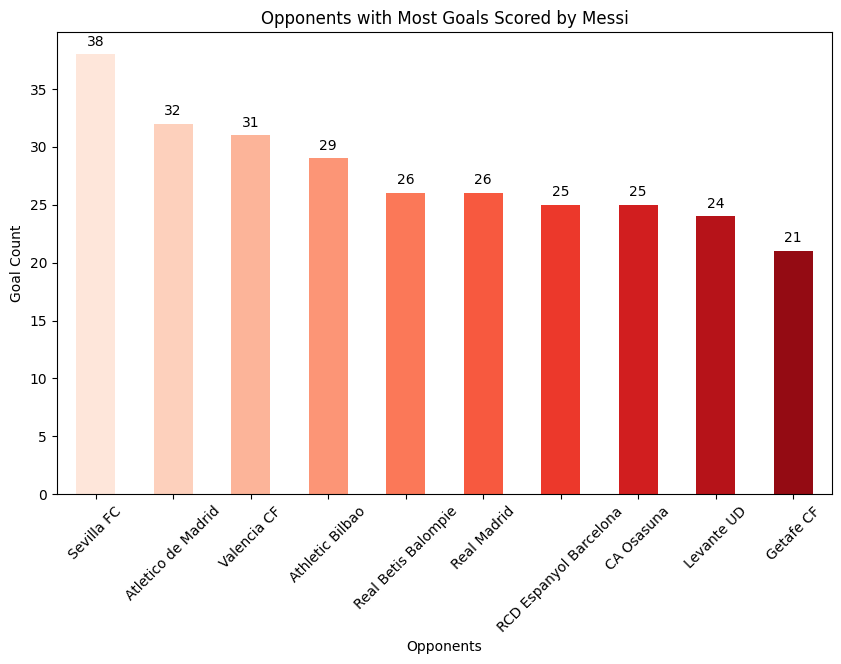

In [74]:
# Extract the top 10 opponents against whom Messi has scored the most goals
top_10_goals = goal_counts.head(10)

# Generate a color palette based on the number of bars
num_bars = len(top_10_goals)
colors = sns.color_palette('Reds', num_bars)

# Plotting the bar chart with auto-generated colors
plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get the current axes
top_10_goals.plot(kind='bar', color=colors, ax=ax)
plt.title('Opponents with Most Goals Scored by Messi')
plt.xlabel('Opponents')
plt.ylabel('Goal Count')
plt.xticks(rotation=45)

# Annotate the values on top of the bars
for i, v in enumerate(top_10_goals):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.show()

<strong> Luis Suarez is the most player assisted Leo Messi <strong>

In [75]:
df.isna().sum()
#Knowing it's football so sometimes when no One assist that means he probably did it without an assist 
#But Type with Null value? That's strange
#Let's invisitate more

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position      0
Minute                0
At_score              0
Type                  1
Goal_assist         214
dtype: int64

<strong> Sevilla FC <strong> is the most with 38 Goal. Wow!

In [76]:
# Condition: Rows where Opponent is "Sevilla"
condition = df['Opponent'] == 'Sevilla FC'

# Filter the "Season" column based on the condition
seasons_against_sevilla = df.loc[condition, 'Season'].values.tolist()

# View the resulting values in the "Season" column
print(seasons_against_sevilla)

#Hmmmmm weird format, Let's explore the Season column

['06-Jul', '07-Aug', '07-Aug', '08-Sep', '08-Sep', '09-Oct', '09-Oct', '09-Oct', '10-Nov', '10-Nov', '10-Nov', '10-Nov', '10-Nov', '11-Dec', 'Dec-13', '13/14', '13/14', '13/14', '14/15', '14/15', '14/15', '14/15', '15/16', '15/16', '15/16', '16/17', '16/17', '16/17', '16/17', '17/18', '17/18', '18/19', '18/19', '18/19', '18/19', '18/19', '19/20', '20/21']


##### Hmmmmm weird format, Let's explore the Season column

In [77]:
# Adjust pandas display options to show all values
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Access and display all the values of a column
column_values = df['Season']
print(column_values)

0      04-May
1      05-Jun
2      05-Jun
3      05-Jun
4      05-Jun
5      05-Jun
6      05-Jun
7      05-Jun
8      05-Jun
9      06-Jul
10     06-Jul
11     06-Jul
12     06-Jul
13     06-Jul
14     06-Jul
15     06-Jul
16     06-Jul
17     06-Jul
18     06-Jul
19     06-Jul
20     06-Jul
21     06-Jul
22     06-Jul
23     06-Jul
24     06-Jul
25     06-Jul
26     07-Aug
27     07-Aug
28     07-Aug
29     07-Aug
30     07-Aug
31     07-Aug
32     07-Aug
33     07-Aug
34     07-Aug
35     07-Aug
36     07-Aug
37     07-Aug
38     07-Aug
39     07-Aug
40     07-Aug
41     07-Aug
42     08-Sep
43     08-Sep
44     08-Sep
45     08-Sep
46     08-Sep
47     08-Sep
48     08-Sep
49     08-Sep
50     08-Sep
51     08-Sep
52     08-Sep
53     08-Sep
54     08-Sep
55     08-Sep
56     08-Sep
57     08-Sep
58     08-Sep
59     08-Sep
60     08-Sep
61     08-Sep
62     08-Sep
63     08-Sep
64     08-Sep
65     08-Sep
66     08-Sep
67     08-Sep
68     08-Sep
69     08-Sep
70     08-Sep
71    

In [78]:
df['Season'].value_counts()

11-Dec    73
Dec-13    60
14/15     58
16/17     54
10-Nov    53
18/19     51
09-Oct    47
17/18     45
13/14     41
15/16     41
20/21     38
08-Sep    38
19/20     31
22/23     18
06-Jul    17
07-Aug    16
21/22     14
05-Jun     8
04-May     1
Name: Season, dtype: int64

In [79]:
#Splitting the column to Mainten the problem
df[['BSeason', 'ESeason']] = df['Season'].str.split('/|-', 1, expand=True)

C:\Users\Tariq\AppData\Local\Temp\ipykernel_8420\870525989.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['BSeason', 'ESeason']] = df['Season'].str.split('/|-', 1, expand=True)


In [80]:
df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,BSeason,ESeason
0,04-May,LaLiga,34,05/01/2005,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho,04,May
1,05-Jun,UEFA Champions League,Group Stage,11/02/2005,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN,05,Jun
2,05-Jun,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo,05,Jun
3,05-Jun,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel,05,Jun
4,05-Jun,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho,05,Jun
5,05-Jun,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,75,0:02,Right-footed shot,Sylvinho,05,Jun
6,05-Jun,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,83,0:03,Left-footed shot,Ronaldinho Gaacho,05,Jun
7,05-Jun,Copa del Rey,Quarter-Finals,02/01/2006,H,FC Barcelona,Real Zaragoza,2:01,CF,42,1:00,Header,Ludovic Giuly,05,Jun
8,05-Jun,LaLiga,24,2/18/06,H,FC Barcelona,Real Betis Balompie,5:01,RW,84,5:01,Left-footed shot,NaN,05,Jun
9,06-Jul,LaLiga,1,8/28/06,A,FC Barcelona,Celta de Vigo,2:03,LW,59,1:02,Left-footed shot,Andres Iniesta,06,Jul


In [81]:
# Define a mapping of month names to numbers
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Convert the Month column to numeric values
df['ESeason'] = df['ESeason'].apply(lambda x: month_mapping.get(x, x))


In [82]:
df['ESeason'].value_counts()

12    73
13    60
15    58
17    54
11    53
19    51
10    47
18    45
14    41
16    41
21    38
9     38
20    31
23    18
7     17
8     16
22    14
6      8
5      1
Name: ESeason, dtype: int64

In [83]:
# Drop the 'Season' column
df = df.drop('Season', axis=1)

In [84]:
# Rename the 'Name' column to 'Full Name'
df = df.rename(columns={'ESeason': 'Season'})

In [86]:
df

,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,BSeason,Season
0,LaLiga,34,05/01/2005,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho,04,5
1,UEFA Champions League,Group Stage,11/02/2005,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN,05,6
2,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo,05,6
3,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel,05,6
4,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho,05,6
5,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,75,0:02,Right-footed shot,Sylvinho,05,6
6,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,83,0:03,Left-footed shot,Ronaldinho Gaacho,05,6
7,Copa del Rey,Quarter-Finals,02/01/2006,H,FC Barcelona,Real Zaragoza,2:01,CF,42,1:00,Header,Ludovic Giuly,05,6
8,LaLiga,24,2/18/06,H,FC Barcelona,Real Betis Balompie,5:01,RW,84,5:01,Left-footed shot,NaN,05,6
9,LaLiga,1,8/28/06,A,FC Barcelona,Celta de Vigo,2:03,LW,59,1:02,Left-footed shot,Andres Iniesta,06,7


In [87]:
# Dropping the Begin of the Season Column
df = df.drop(columns = "BSeason", axis=1)

In [88]:
df

,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Season
0,LaLiga,34,05/01/2005,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho,5
1,UEFA Champions League,Group Stage,11/02/2005,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN,6
2,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo,6
3,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel,6
4,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho,6
5,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,75,0:02,Right-footed shot,Sylvinho,6
6,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:03,CF,83,0:03,Left-footed shot,Ronaldinho Gaacho,6
7,Copa del Rey,Quarter-Finals,02/01/2006,H,FC Barcelona,Real Zaragoza,2:01,CF,42,1:00,Header,Ludovic Giuly,6
8,LaLiga,24,2/18/06,H,FC Barcelona,Real Betis Balompie,5:01,RW,84,5:01,Left-footed shot,NaN,6
9,LaLiga,1,8/28/06,A,FC Barcelona,Celta de Vigo,2:03,LW,59,1:02,Left-footed shot,Andres Iniesta,7


In [89]:
df["Season"].unique()

array([5, 6, 7, 8, 9, 10, 11, 12, '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23'], dtype=object)

In [90]:
df.columns

Index(['Competition', 'Matchday', 'Date', 'Venue', 'Club', 'Opponent',
       'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist', 'Season'],
      dtype='object')

### Goal in A single season

In [98]:
df["Season"]

0       5
1       6
2       6
3       6
4       6
5       6
6       6
7       6
8       6
9       7
10      7
11      7
12      7
13      7
14      7
15      7
16      7
17      7
18      7
19      7
20      7
21      7
22      7
23      7
24      7
25      7
26      8
27      8
28      8
29      8
30      8
31      8
32      8
33      8
34      8
35      8
36      8
37      8
38      8
39      8
40      8
41      8
42      9
43      9
44      9
45      9
46      9
47      9
48      9
49      9
50      9
51      9
52      9
53      9
54      9
55      9
56      9
57      9
58      9
59      9
60      9
61      9
62      9
63      9
64      9
65      9
66      9
67      9
68      9
69      9
70      9
71      9
72      9
73      9
74      9
75      9
76      9
77      9
78      9
79      9
80     10
81     10
82     10
83     10
84     10
85     10
86     10
87     10
88     10
89     10
90     10
91     10
92     10
93     10
94     10
95     10
96     10
97     10
98     10
99     10


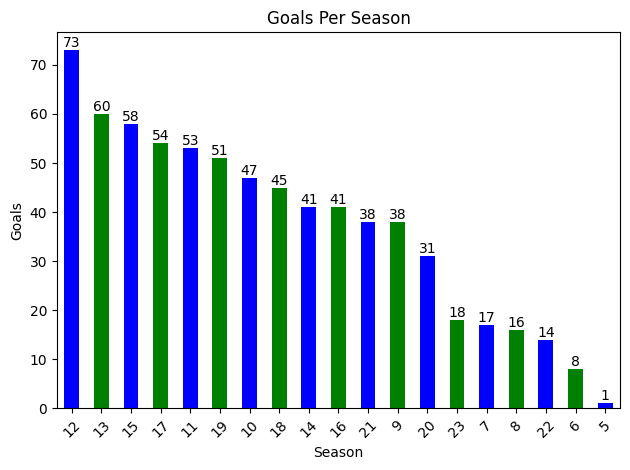

In [99]:
# Plot the value counts of Season
season_counts = df['Season'].value_counts()

# Define two colors for the bars
colors = ['blue', 'green']

# Create the bar plot
ax = season_counts.plot(kind='bar', color=colors)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Goals')
plt.title('Goals Per Season')

# Add count values on top of each bar
for i, count in enumerate(season_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Customize the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Display the plot
plt.tight_layout()  # Adjust spacing between elements
plt.show()

#### So Leo Messi best Season is 
- 11/12 70 Goal
- 12/13 60 Goal
- 14/15 58 Goal

<strong> Messi Didn't blank a single Season in his Career <strong>

### Positions played In